# Heart Disease

## Intro

This data set 

data source : https://archive.ics.uci.edu/dataset/45/heart+disease

Let's import the necessary libraries for this data and load the data:

In [49]:
import pandas as pd
import matplotlib.pyplot as mplot
import seaborn as sb
import numpy as np

data = pd.read_csv('heart_disease_data.csv')

Here is an overview of the data:

In [50]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


We will use diagnosis as the variable we want to predict. There will be relationships between most of the variables listed above and whether or not the patient has got heart disease. We're going to explore the variables and attempt to replicate the distribution of the data in relation to diagnosis.

These are the descriptions of our attributes:
- **AGE:** in years
- **SEX:** 1 = male, 0 = female
- **CP:** Chest pain
  - 1 = Typical angina
  - 2 = Atypical angina
  - 3 = Non-anginal pain
   - 4 = Asymptomatic
- **TRSETBPS :** Resting blood pressure (in mg Hg on admission to the hospital)
- **CHOL :** serum cholesterol in mg/dL
- **FBS :** (fasting blood sugar > 120 mg/dL) (1 = true; 0 = false)
- **RESTECG :** resting electrocardiographic results
- **THALACH :** maximum heart rate achieved
- **EXANG :** exercise-induced angina (1 = yes; 0 = no)
- **OLDPEAK :** ST depression induced by exercise relative to rest
- **SLOPE :** the slope of the peak exercise ST segment
  - 1 = upsloping
  - 2 = flat
  - 3 = downsloping
- **CA :** number of major vessels (0-3) colored by fluoroscopy
- **THAL :** 3 = normal; 6 = fixed defect; 7 = reversible defect
- **DIAGNOSIS :** 1 = yes , 0 = no



Let's now check for any null values in data before we do analysis:

In [51]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
diagnosis    0
dtype: int64

We can see the data has no null values. Now we can also take a look at some statistics of the data:


In [52]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.464646
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499590
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


## Analysis of variables

### Age

Let's see how age is distributed in our dataset:

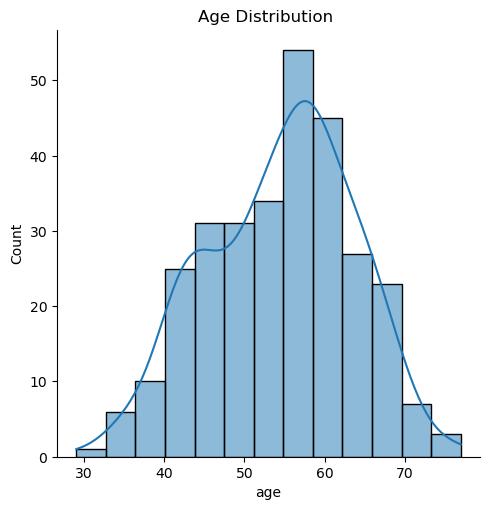

In [53]:
sb.displot(data, x="age", kde=True) 
mplot.title("Age Distribution ")
mplot.show()

This tells us the age distribution of all patients are between approx 35 and 75 years old. Age seems to be normally distributed alpng with the some outliers for under 30 years old and over 75 years old.

Now, let's try to generate a normal age distribution. Earlier we looked at the stats of our dataset and they showed us an averagre age of 55 and a standard distribution of 9. 



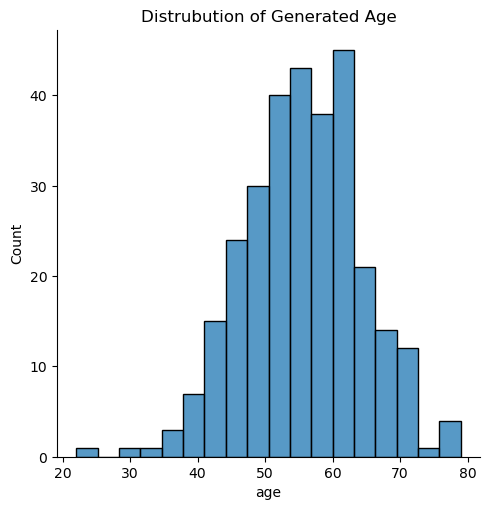

In [54]:
# Set a seed to ensure consistency in generating data
np.random.seed(6)

gen_age = pd.DataFrame(columns=['age'])

# We will generate 300 data points which is similar total to existing dataset
generate_age = np.random.normal(55,9,300)

# we want to round age for plotting
gen_age['age'] = generate_age.round(0)

sb.displot(gen_age['age'])
mplot.title("Distrubution of Generated Age")
mplot.show()


Both the plots from actual dataset and generated dataset have a similar age distribution.